In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

In [9]:
with open("./sim_outputs/html/DM_gSq_only_2.html", 'r') as htmlFile:
    tabla = pd.read_html(htmlFile.read())

/tmp/ipykernel_26973/2424440116.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tabla = pd.read_html(htmlFile.read())


In [10]:
tabla[0]

,Graph,Cross-Section,Error,Events (K),Unwgt,Luminosity
0,diagrams/DM_gSq_only/diagrams_1_gg_y0uux_y0_xdxdx,5.501000e-13,7.080000e-15,28.040,2017.0,0
1,diagrams/DM_gSq_only/diagrams_1_gg_y0ccx_y0_xdxdx,1.350000e-07,2.960000e-09,28.040,2076.0,0
2,diagrams/DM_gSq_only/diagrams_1_gg_y0ddx_y0_xdxdx,2.137000e-12,2.810000e-14,28.040,2119.0,0
3,diagrams/DM_gSq_only/diagrams_1_gg_y0ssx_y0_xdxdx,8.729000e-10,1.220000e-11,28.040,2022.0,0
4,diagrams/DM_gSq_only/diagrams_1_gg_y0bbx_y0_xdxdx,1.817000e-06,1.150000e-08,53.085,4730.0,0
5,diagrams/DM_gSq_only/diagrams_1_gu_y0gu_y0_xdxdx,2.236000e-10,2.070000e-12,56.080,3548.0,0
6,diagrams/DM_gSq_only/diagrams_1_gc_y0gc_y0_xdxdx,2.064000e-06,1.460000e-08,76.792,5716.0,0
7,diagrams/DM_gSq_only/diagrams_1_gd_y0gd_y0_xdxdx,3.720000e-10,3.430000e-12,56.080,3401.0,0
8,diagrams/DM_gSq_only/diagrams_1_gs_y0gs_y0_xdxdx,1.835000e-08,1.960000e-10,56.080,3761.0,0
9,diagrams/DM_gSq_only/diagrams_1_gb_y0gb_y0_xdxdx,1.639000e-05,4.690000e-08,477.135,38424.0,0


In [3]:
# Signal
cases = ["gSq_only","gSg1_only", "gSg2_only_y0y0", "gSg_only"]

tables = {}
for i in cases:
    tables[i] = []
    htmlFileNames = [f"./sim_outputs/html/DM_{i}_{j}.html" for j in range(1,3)]
    for fileName in htmlFileNames:
        with open(fileName, 'r') as htmlFile:
            table = pd.read_html(htmlFile.read())
        tables[i].append(table[0])

/tmp/ipykernel_27395/3325374344.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(htmlFile.read())
/tmp/ipykernel_27395/3325374344.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(htmlFile.read())
/tmp/ipykernel_27395/3325374344.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(htmlFile.read())
/tmp/ipykernel_27395/3325374344.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(htmlFile.read())
/tmp/ipy

In [21]:
for i in range(4):
    for j in range(2):
        tables[cases[i]][j]['Contribution'] = tables[cases[i]][j]['Cross-Section']/tables[cases[i]][j]['Cross-Section'].sum()

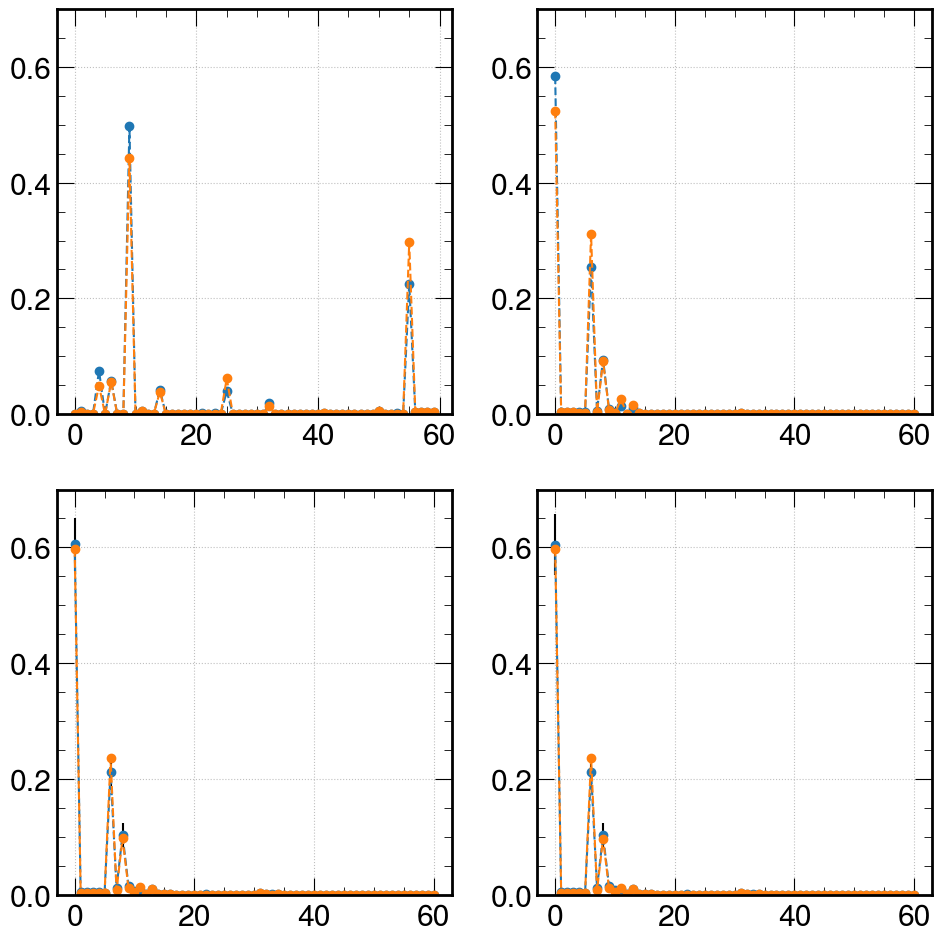

In [22]:
fig, ax = plt.subplots(2,2)
for i in range(2):
    ax[0,0].errorbar(y=tables[cases[0]][i]['Contribution'], x=range(tables[cases[0]][i].shape[0]), yerr=tables[cases[0]][i]['Error'],marker='o', linestyle='--', ecolor="black")
    ax[1,0].errorbar(y=tables[cases[1]][i]['Contribution'], x=range(tables[cases[1]][i].shape[0]), yerr=tables[cases[1]][i]['Error'],marker='o', linestyle='--', ecolor="black")
    ax[0,1].errorbar(y=tables[cases[2]][i]['Contribution'], x=range(tables[cases[2]][i].shape[0]), yerr=tables[cases[2]][i]['Error'],marker='o', linestyle='--', ecolor="black")
    ax[1,1].errorbar(y=tables[cases[3]][i]['Contribution'], x=range(tables[cases[3]][i].shape[0]), yerr=tables[cases[3]][i]['Error'],marker='o', linestyle='--', ecolor="black")

    for j in range(2):
        ax[i,j].set_ylim(0,0.7)
        ax[i,j].grid()

plt.tight_layout()
plt.show()

gSq_only
mx = 10GeV, my = 100GeV
<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC524520>


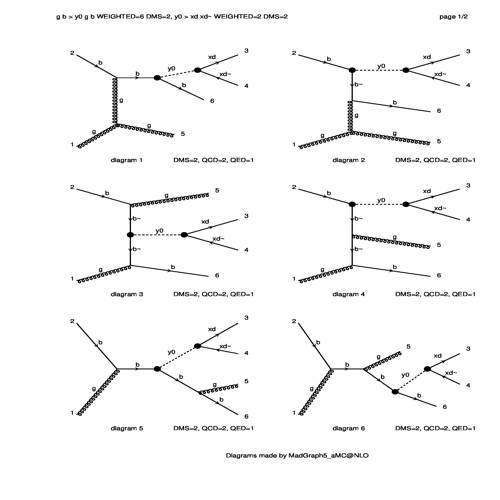

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC577F40>


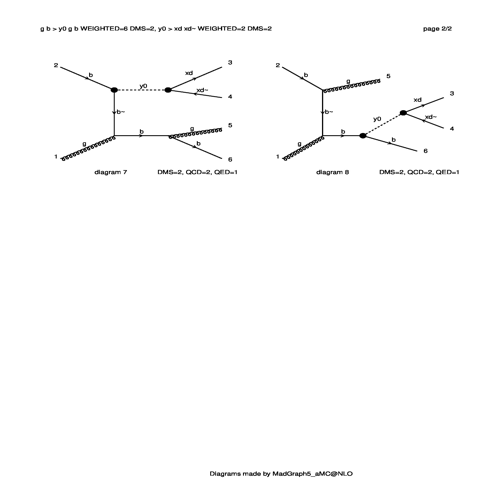

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC37BD00>


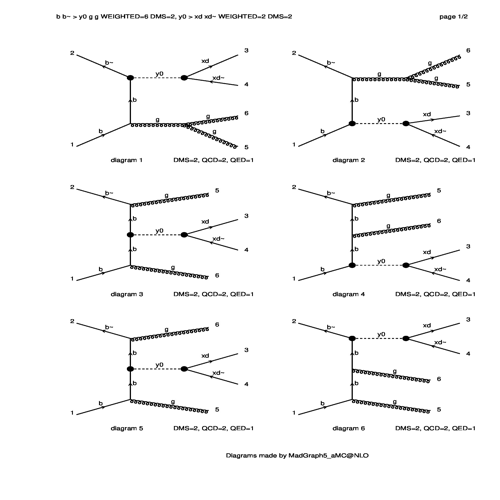

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FD07D930>


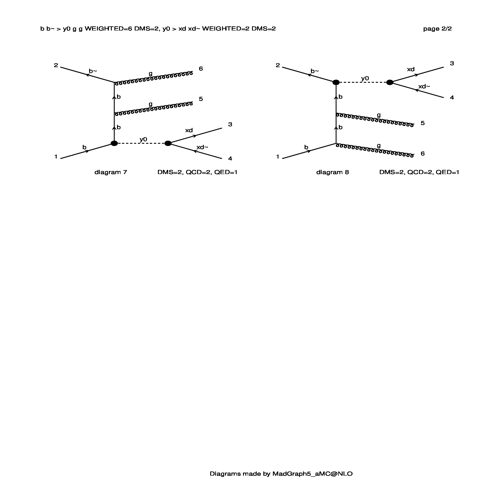

mx = 10GeV, my = 2TeV
<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC37A8C0>


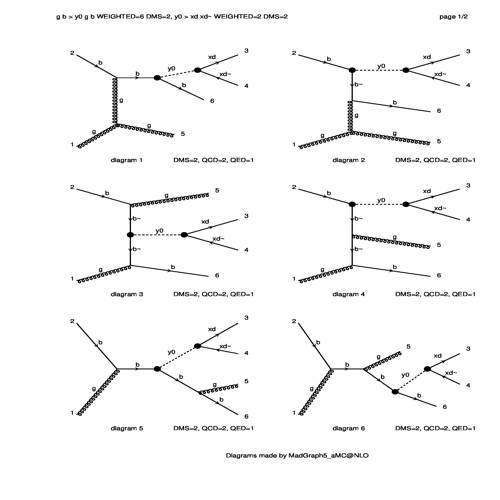

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC3BB5E0>


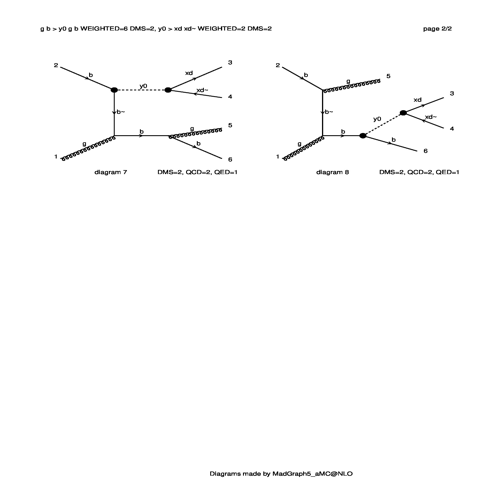

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC4DE230>


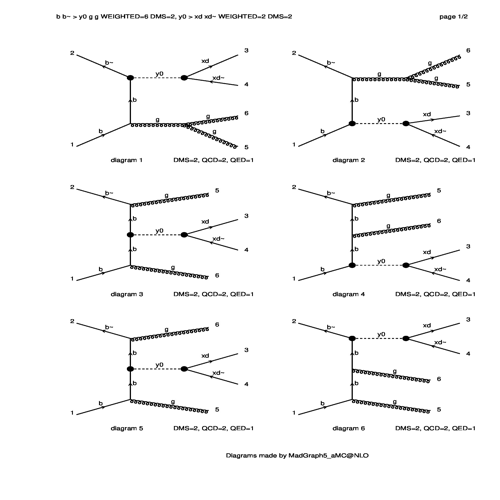

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC3BB970>


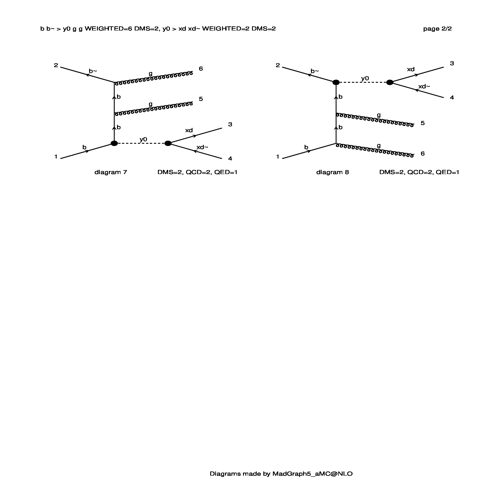

In [40]:
from PIL import Image
from IPython.display import display
cases_description = ['mx = 10GeV, my = 100GeV', 'mx = 10GeV, my = 2TeV']
# case 0
print(cases[0])
i_case = 0
for j in range(2):
    print(cases_description[j])
    diagrams = tables[cases[i_case]][j]['Graph'][tables[cases[i_case]][j]['Contribution'] >= 0.1].values # More than 10% of the cross-section
    for diagram in diagrams:
        imgs = []
        try:
            imgs.append(Image.open('sim_outputs/'+diagram+'.jpg').resize((500,500)))
        except FileNotFoundError:
            for i in range(3):
                try:
                    imgs.append(Image.open('sim_outputs/'+diagram+f'-{i}.jpg').resize((500,500)))
                except FileNotFoundError:
                    break
        for img in imgs:
            print(img)
            display(img)


gSg1_only
mx = 10GeV, my = 100GeV
<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC527DC0>


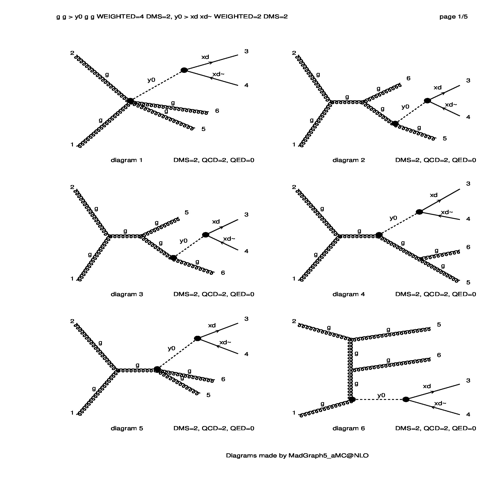

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC526BF0>


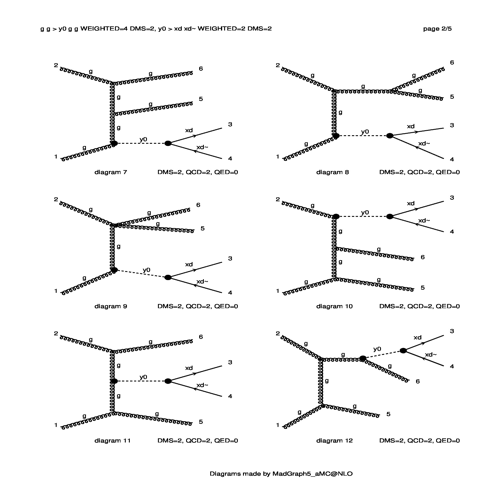

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC3BB4C0>


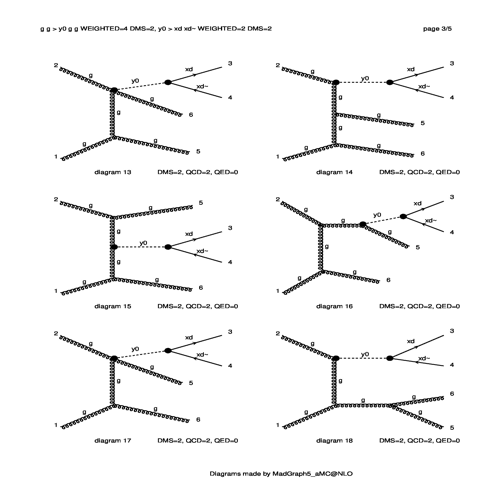

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC37A710>


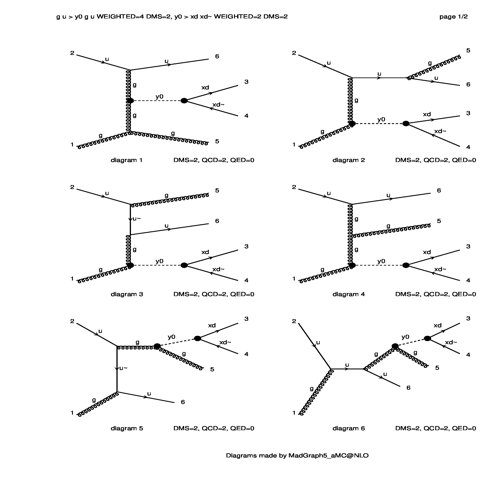

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC503340>


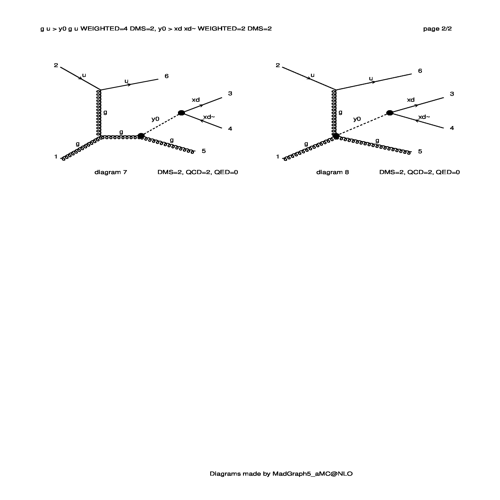

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC3BB2E0>


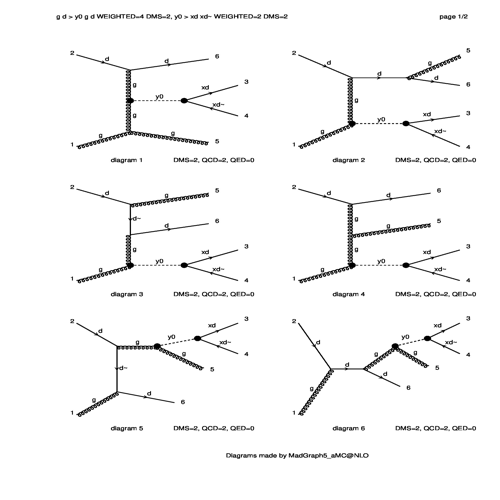

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC3BB790>


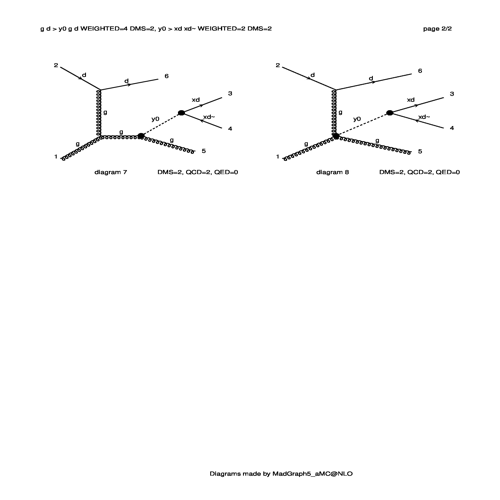

mx = 10GeV, my = 2TeV
<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FD07D930>


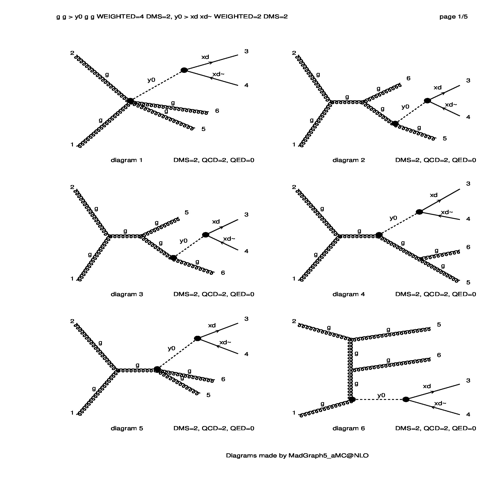

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC503340>


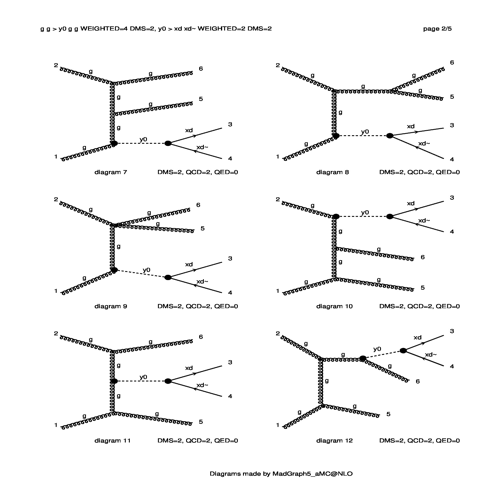

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC3BBAC0>


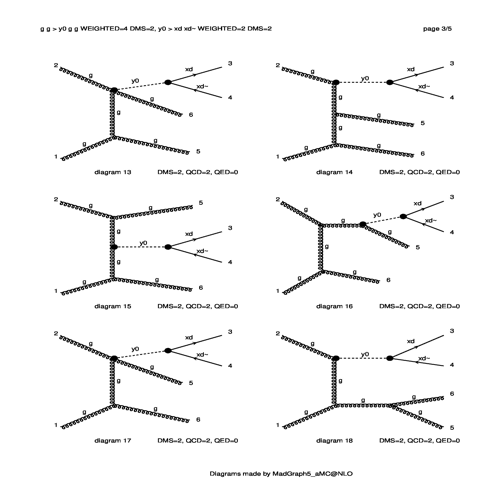

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC37A710>


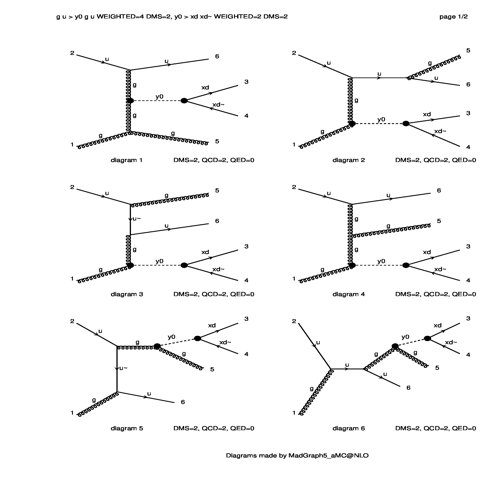

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC527DC0>


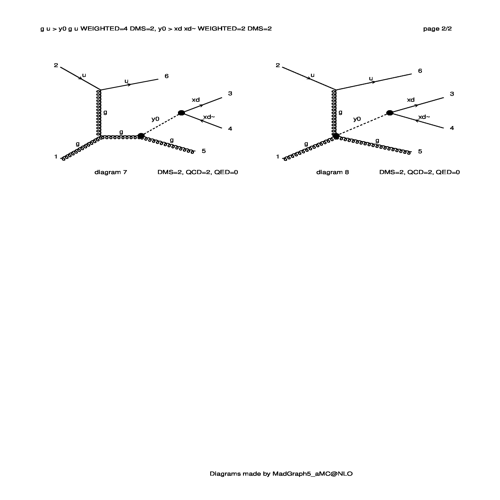

In [43]:
from PIL import Image
from IPython.display import display
cases_description = ['mx = 10GeV, my = 100GeV', 'mx = 10GeV, my = 2TeV']
# case 0
i_case = 1
print(cases[i_case])
for j in range(2):
    print(cases_description[j])
    diagrams = tables[cases[i_case]][j]['Graph'][tables[cases[i_case]][j]['Contribution'] >= 0.1].values # More than 10% of the cross-section
    for diagram in diagrams:
        imgs = []
        try:
            imgs.append(Image.open('sim_outputs/'+diagram+'.jpg').resize((500,500)))
        except FileNotFoundError:
            for i in range(3):
                try:
                    imgs.append(Image.open('sim_outputs/'+diagram+f'-{i}.jpg').resize((500,500)))
                except FileNotFoundError:
                    break
        for img in imgs:
            print(img)
            display(img)


gSg2_only_y0y0
mx = 10GeV, my = 100GeV
<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC37A530>


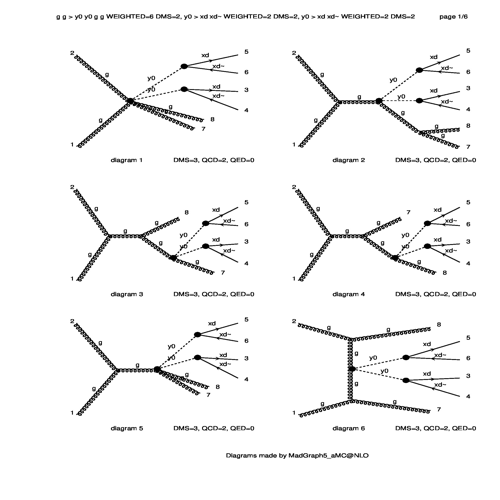

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC4DE230>


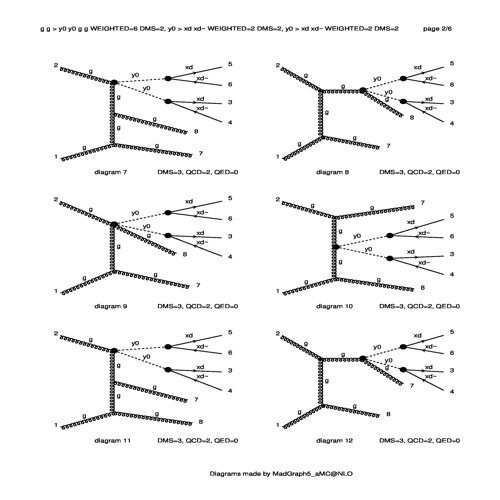

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC502DA0>


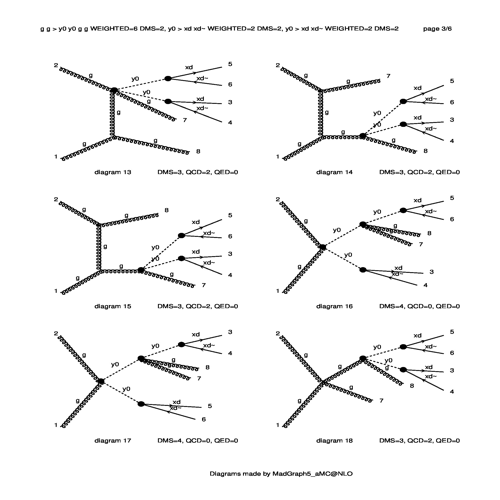

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC524520>


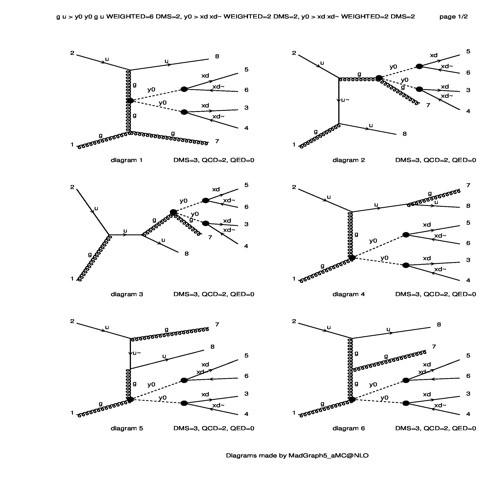

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FD07D930>


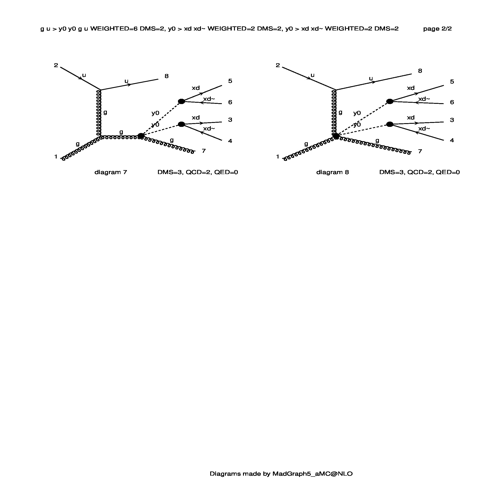

mx = 10GeV, my = 2TeV
<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC502DA0>


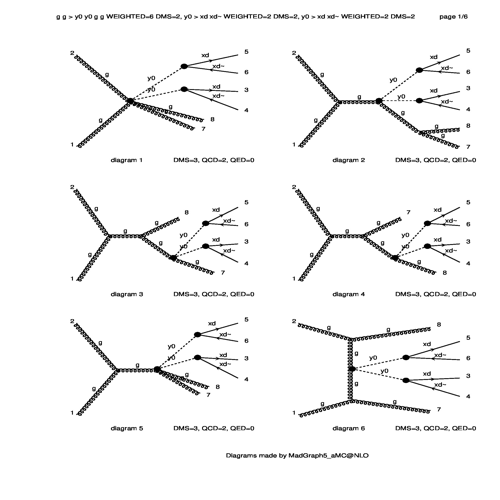

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC577F40>


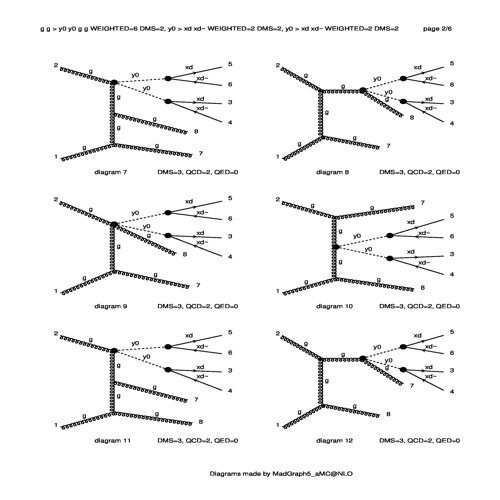

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC3BB2E0>


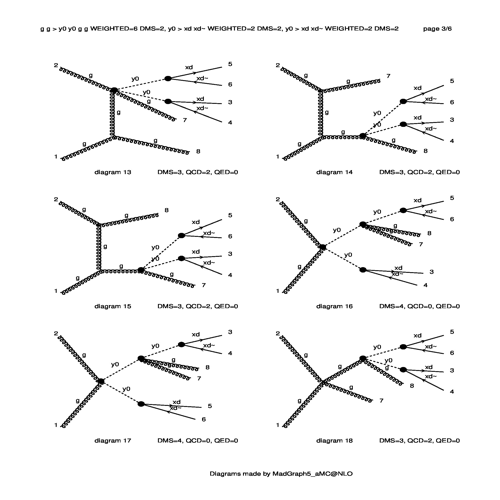

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC37A710>


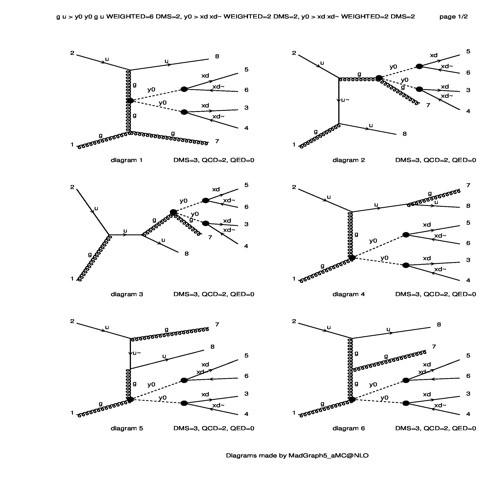

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FD07D930>


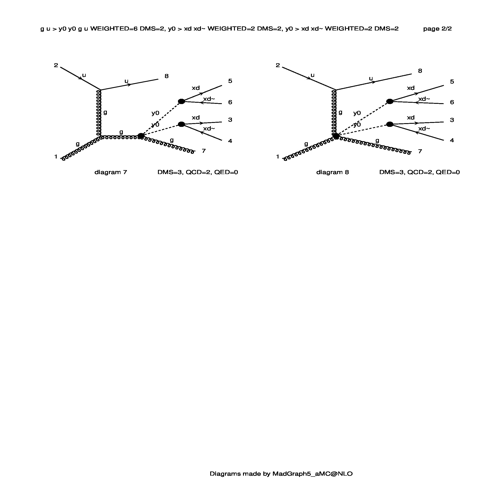

In [44]:
from PIL import Image
from IPython.display import display
cases_description = ['mx = 10GeV, my = 100GeV', 'mx = 10GeV, my = 2TeV']
# case 0
i_case = 2
print(cases[i_case])
for j in range(2):
    print(cases_description[j])
    diagrams = tables[cases[i_case]][j]['Graph'][tables[cases[i_case]][j]['Contribution'] >= 0.1].values # More than 10% of the cross-section
    for diagram in diagrams:
        imgs = []
        try:
            imgs.append(Image.open('sim_outputs/'+diagram+'.jpg').resize((500,500)))
        except FileNotFoundError:
            for i in range(3):
                try:
                    imgs.append(Image.open('sim_outputs/'+diagram+f'-{i}.jpg').resize((500,500)))
                except FileNotFoundError:
                    break
        for img in imgs:
            print(img)
            display(img)


gSg_only
mx = 10GeV, my = 100GeV
<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FCA03C70>


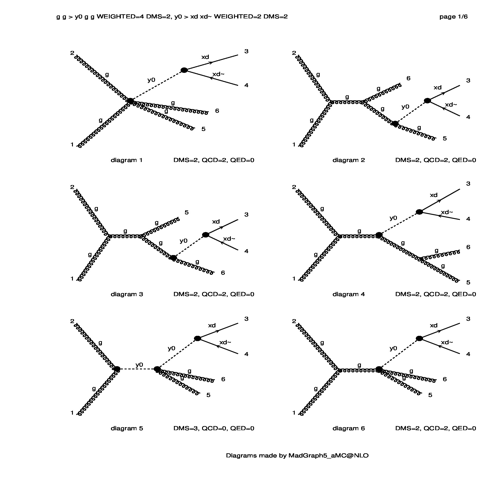

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FCA02380>


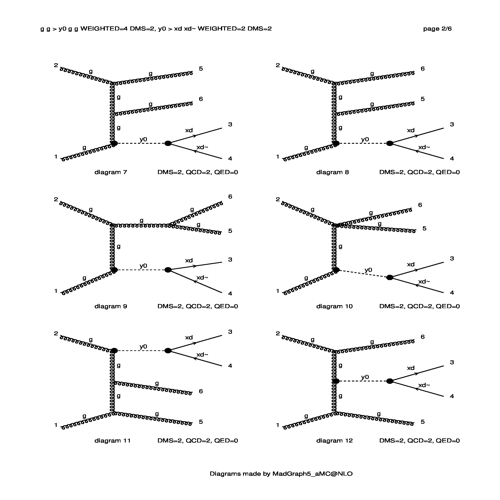

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FCA01FF0>


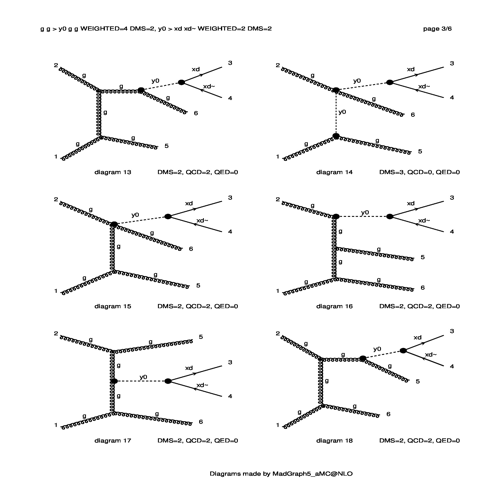

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FCA020B0>


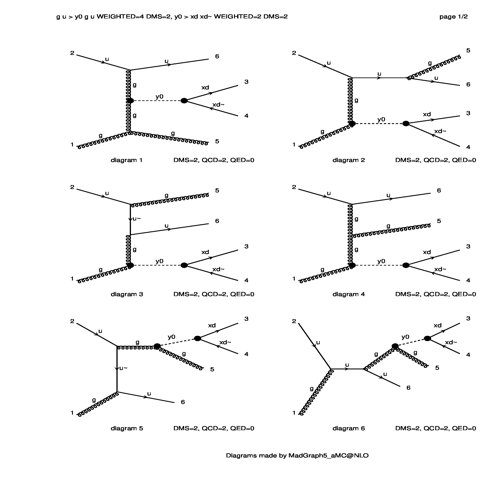

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FCA00D90>


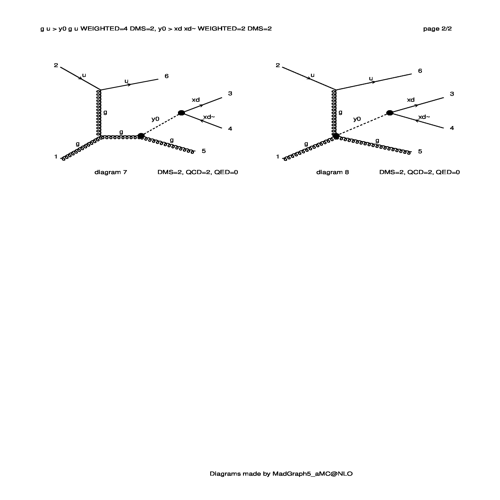

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FD07D930>


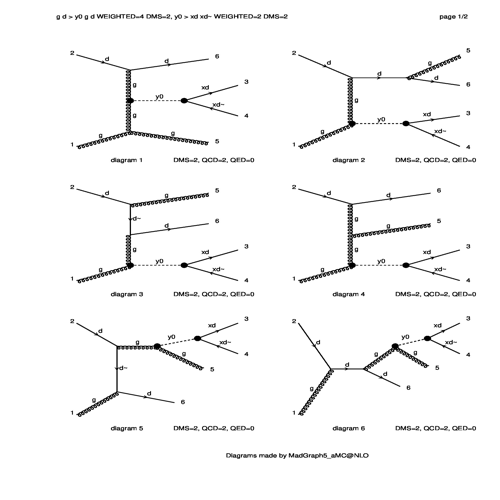

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FCA01480>


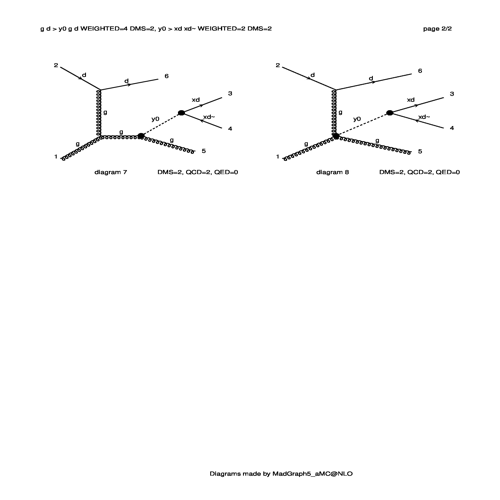

mx = 10GeV, my = 2TeV
<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC3BB5E0>


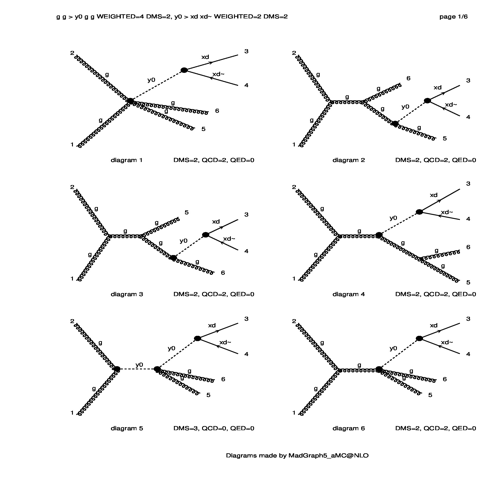

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FCA007C0>


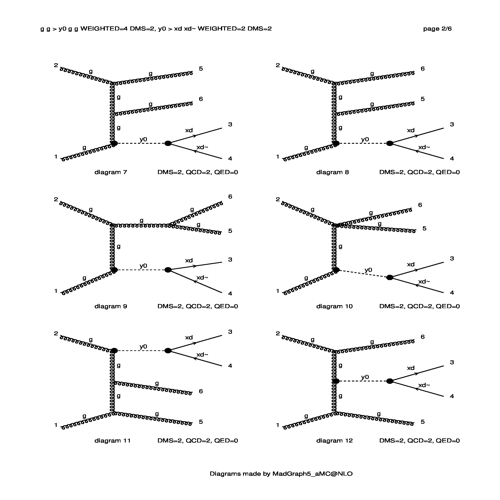

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FCA01C00>


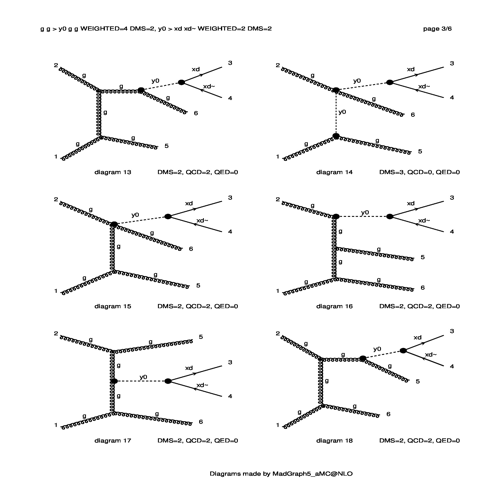

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FC77DEA0>


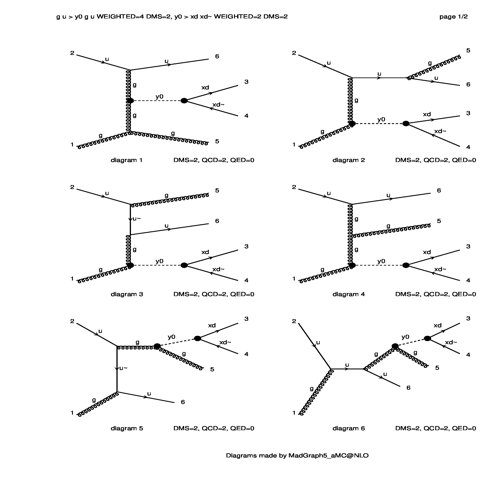

<PIL.Image.Image image mode=L size=500x500 at 0x7FF1FCA03F10>


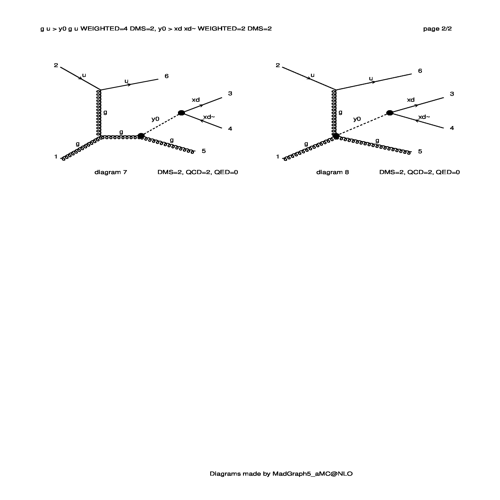

In [45]:
from PIL import Image
from IPython.display import display
cases_description = ['mx = 10GeV, my = 100GeV', 'mx = 10GeV, my = 2TeV']
# case 0
i_case = 3
print(cases[i_case])
for j in range(2):
    print(cases_description[j])
    diagrams = tables[cases[i_case]][j]['Graph'][tables[cases[i_case]][j]['Contribution'] >= 0.1].values # More than 10% of the cross-section
    for diagram in diagrams:
        imgs = []
        try:
            imgs.append(Image.open('sim_outputs/'+diagram+'.jpg').resize((500,500)))
        except FileNotFoundError:
            for i in range(3):
                try:
                    imgs.append(Image.open('sim_outputs/'+diagram+f'-{i}.jpg').resize((500,500)))
                except FileNotFoundError:
                    break
        for img in imgs:
            print(img)
            display(img)
